<a href="https://colab.research.google.com/github/mereetmoner/alzhiemer/blob/main/cnn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Librarie**

In [2]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

**Getting the data**

In [3]:
file_path = '/content/drive/MyDrive/Alzheimer_s Dataset'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['test ' 'train']


In [4]:
file_path = '/content/drive/MyDrive/Alzheimer_s Dataset/train'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


**Visualizing random images with labels from the data**

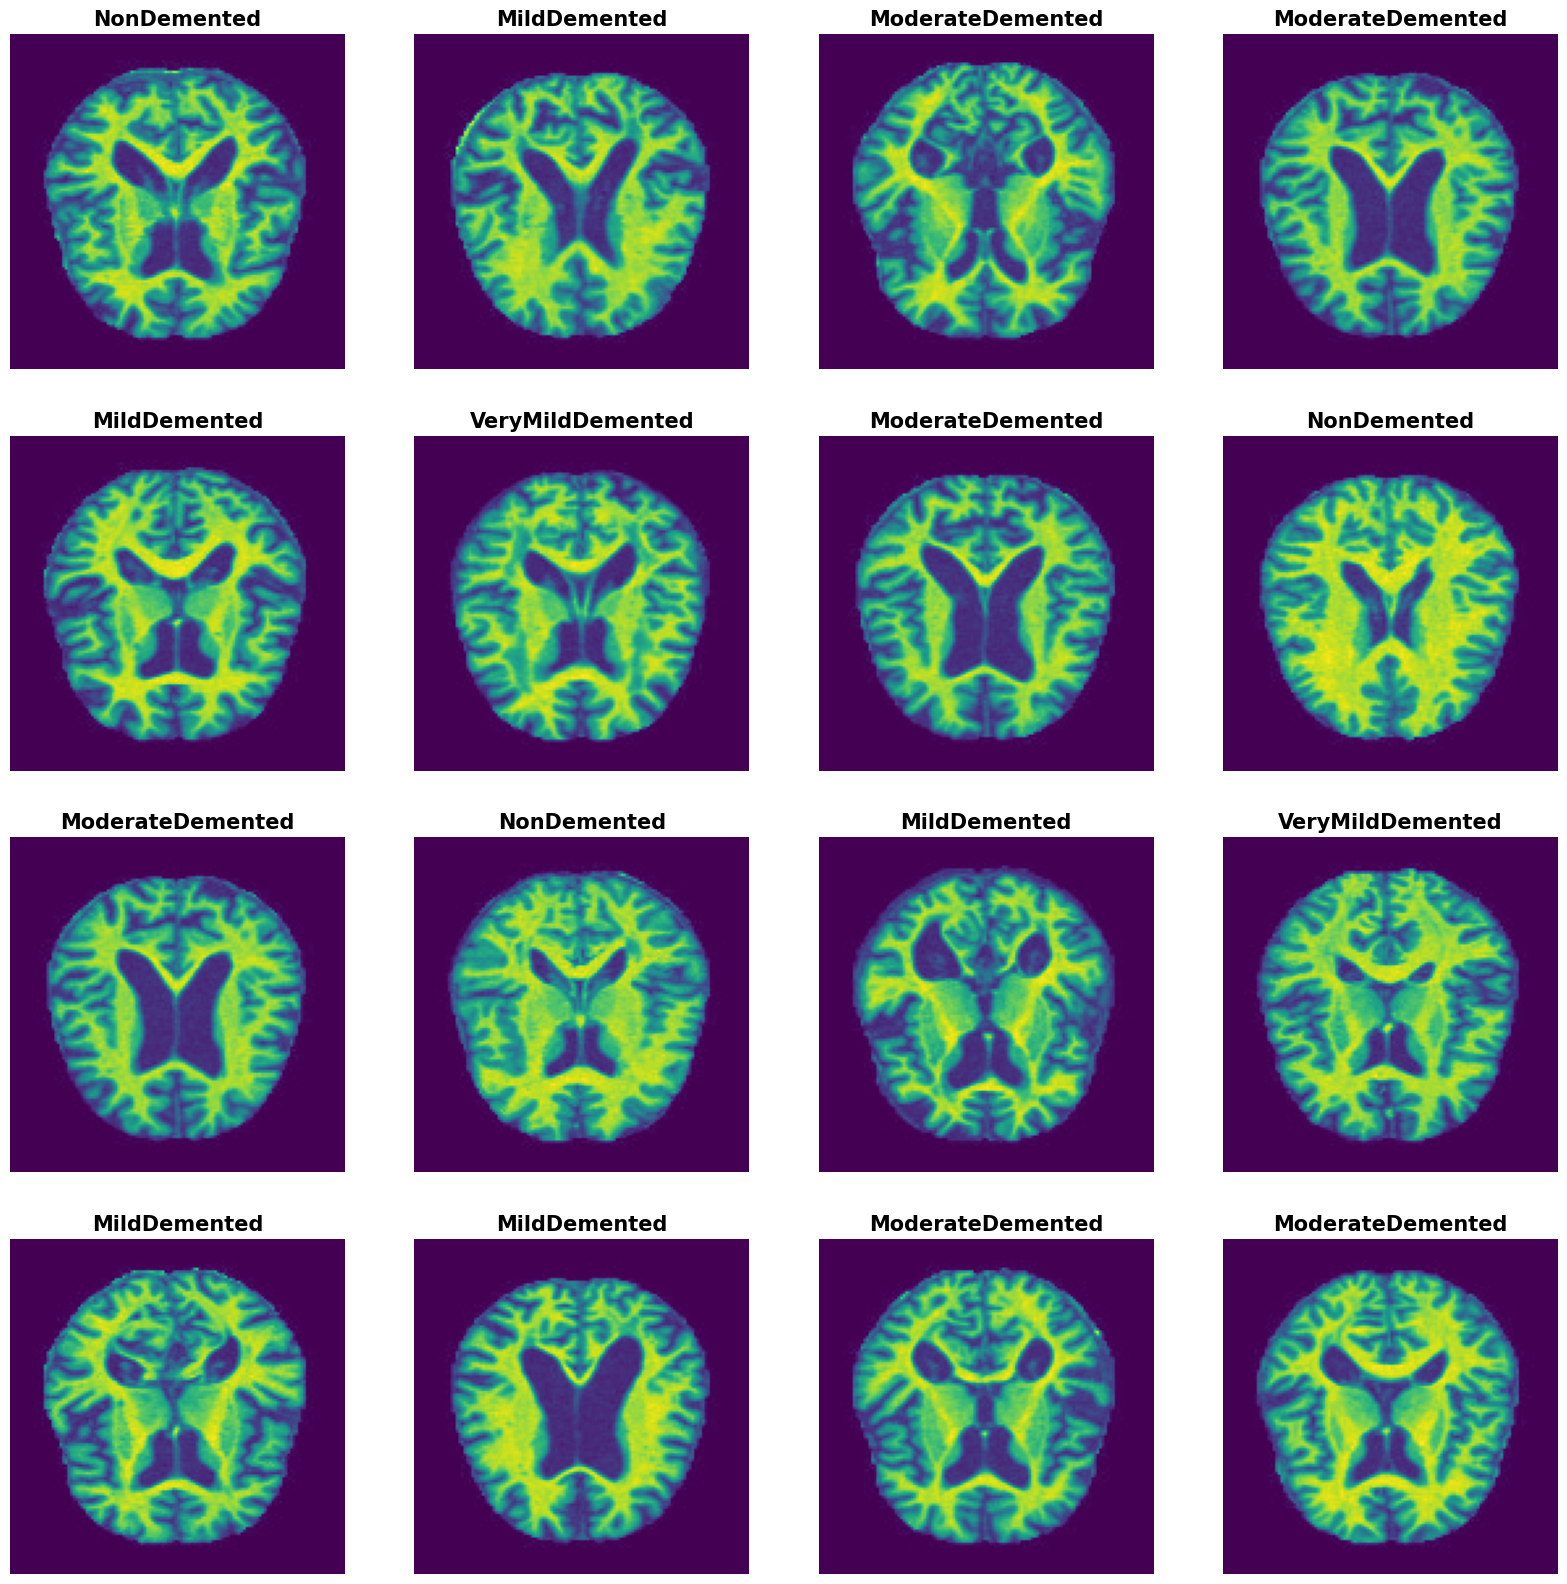

In [5]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

**Preparing the dataset for building CNN**

In [6]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)

Found 5141 files belonging to 4 classes.
Using 4113 files for training.
Found 5141 files belonging to 4 classes.
Using 1028 files for validation.


**Building the model**

In [7]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

**Fitting the model**

In [8]:
history = model.fit(X_train, epochs = 50, validation_data=X_validation, verbose=1)

Epoch 1/50
129/129 [==============================] - 952s 7s/step - loss: 0.9940 - accuracy: 0.5201 - val_loss: 0.9036 - val_accuracy: 0.5642
Epoch 2/50
129/129 [==============================] - 15s 108ms/step - loss: 0.8350 - accuracy: 0.6139 - val_loss: 0.8021 - val_accuracy: 0.6109
Epoch 3/50
129/129 [==============================] - 17s 127ms/step - loss: 0.6817 - accuracy: 0.6922 - val_loss: 0.6475 - val_accuracy: 0.7062
Epoch 4/50
129/129 [==============================] - 14s 106ms/step - loss: 0.5053 - accuracy: 0.7843 - val_loss: 0.4223 - val_accuracy: 0.8171
Epoch 5/50
129/129 [==============================] - 14s 106ms/step - loss: 0.3347 - accuracy: 0.8643 - val_loss: 0.3260 - val_accuracy: 0.8667
Epoch 6/50
129/129 [==============================] - 14s 107ms/step - loss: 0.2372 - accuracy: 0.9086 - val_loss: 0.2363 - val_accuracy: 0.8998
Epoch 7/50
129/129 [==============================] - 14s 106ms/step - loss: 0.1623 - accuracy: 0.9378 - val_loss: 0.2252 - val_accu

**Model evaluation**

In [9]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

33/33 [==============================] - 3s 61ms/step - loss: 0.0290 - accuracy: 0.9903
Accuracy: % 99.03
Loss: % 2.90


[]

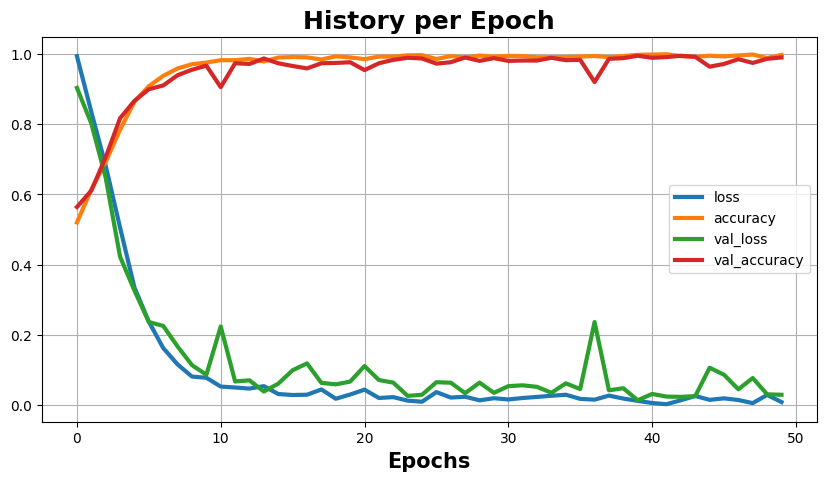

In [10]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

1/1 [==============================] - 0s 17ms/step


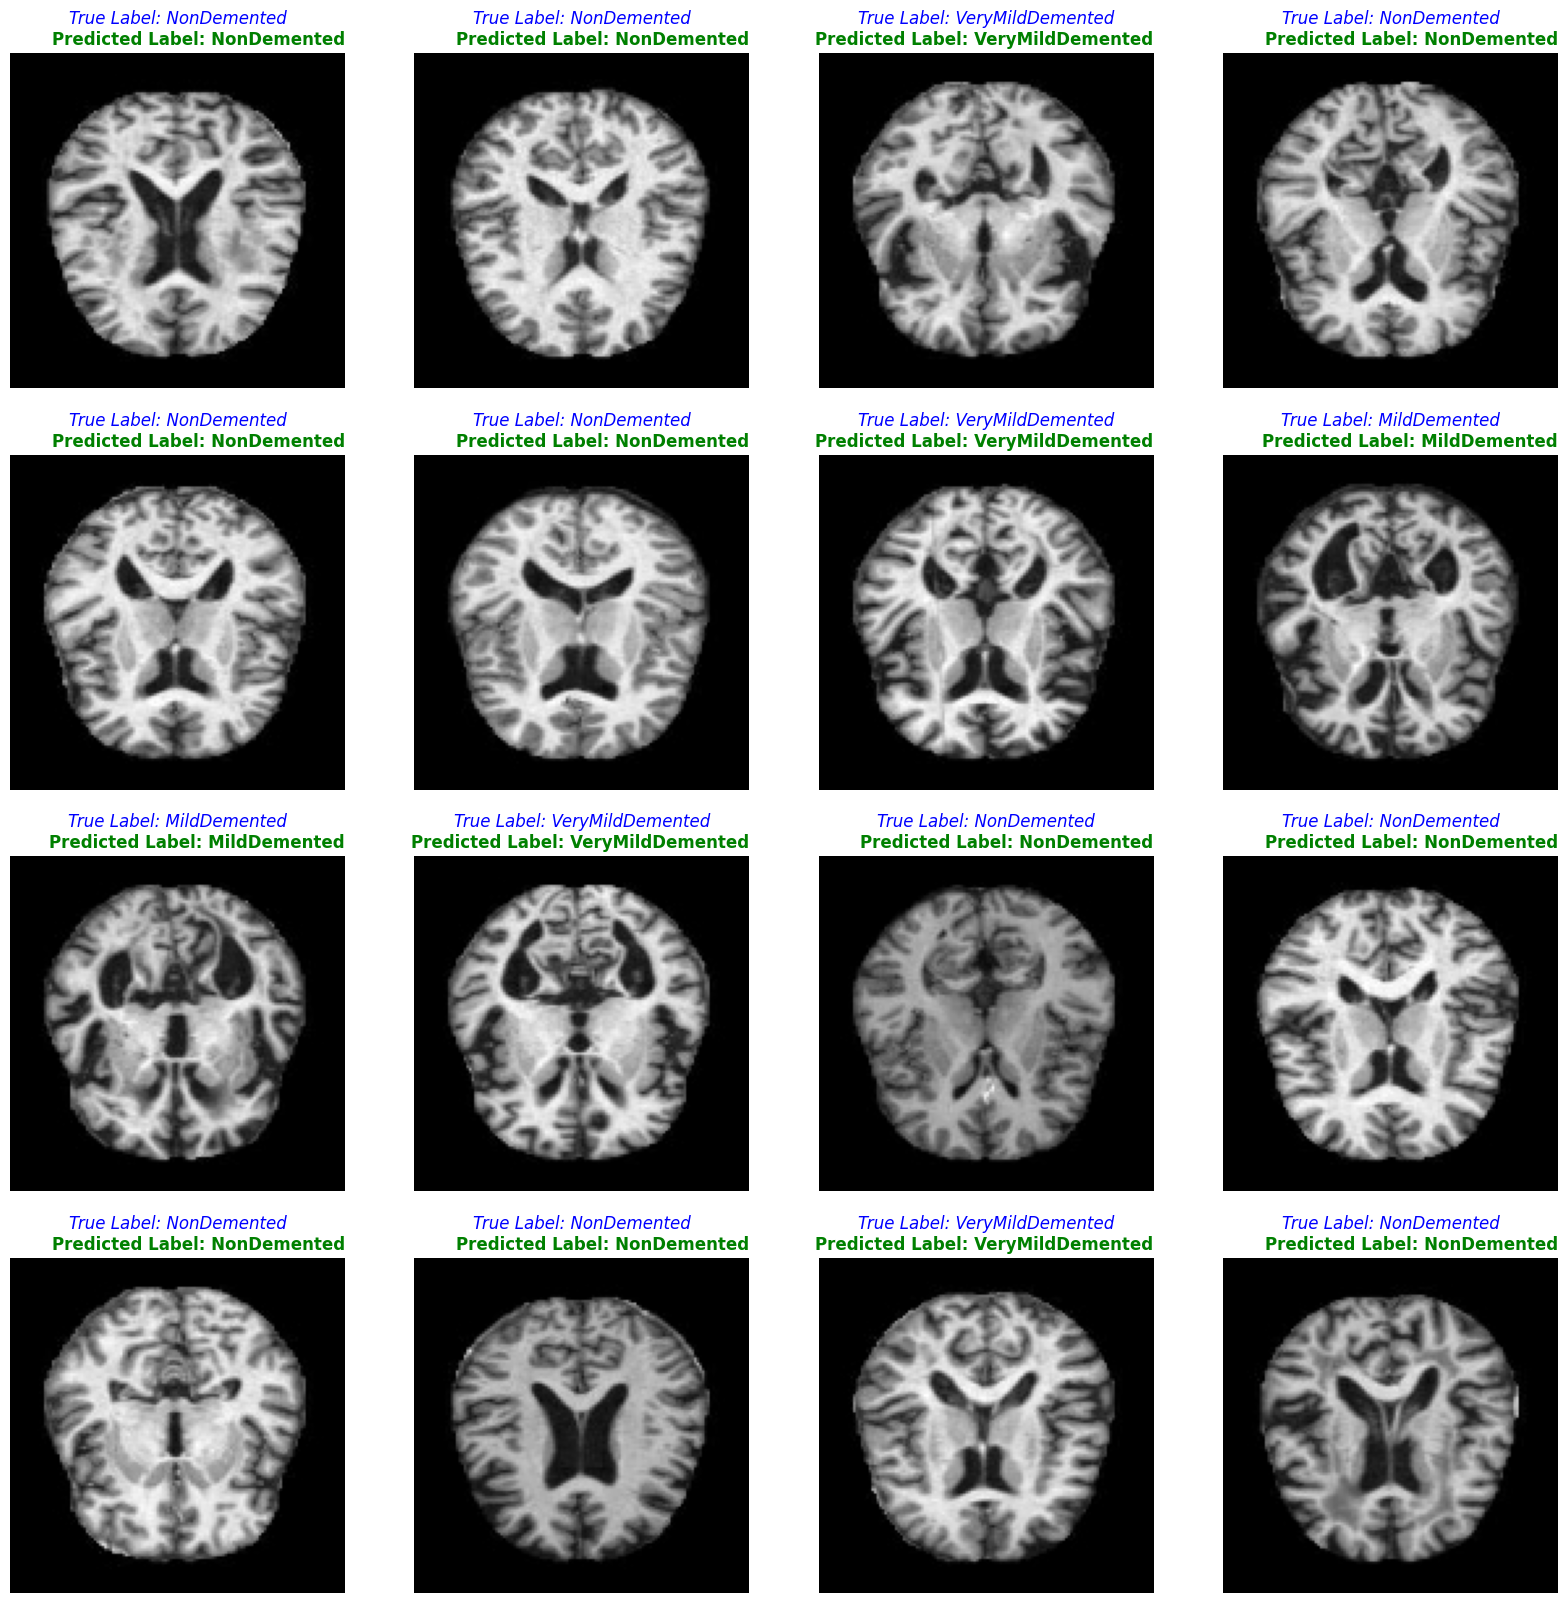

In [11]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

1/1 [==============================] - 0s 19ms/step


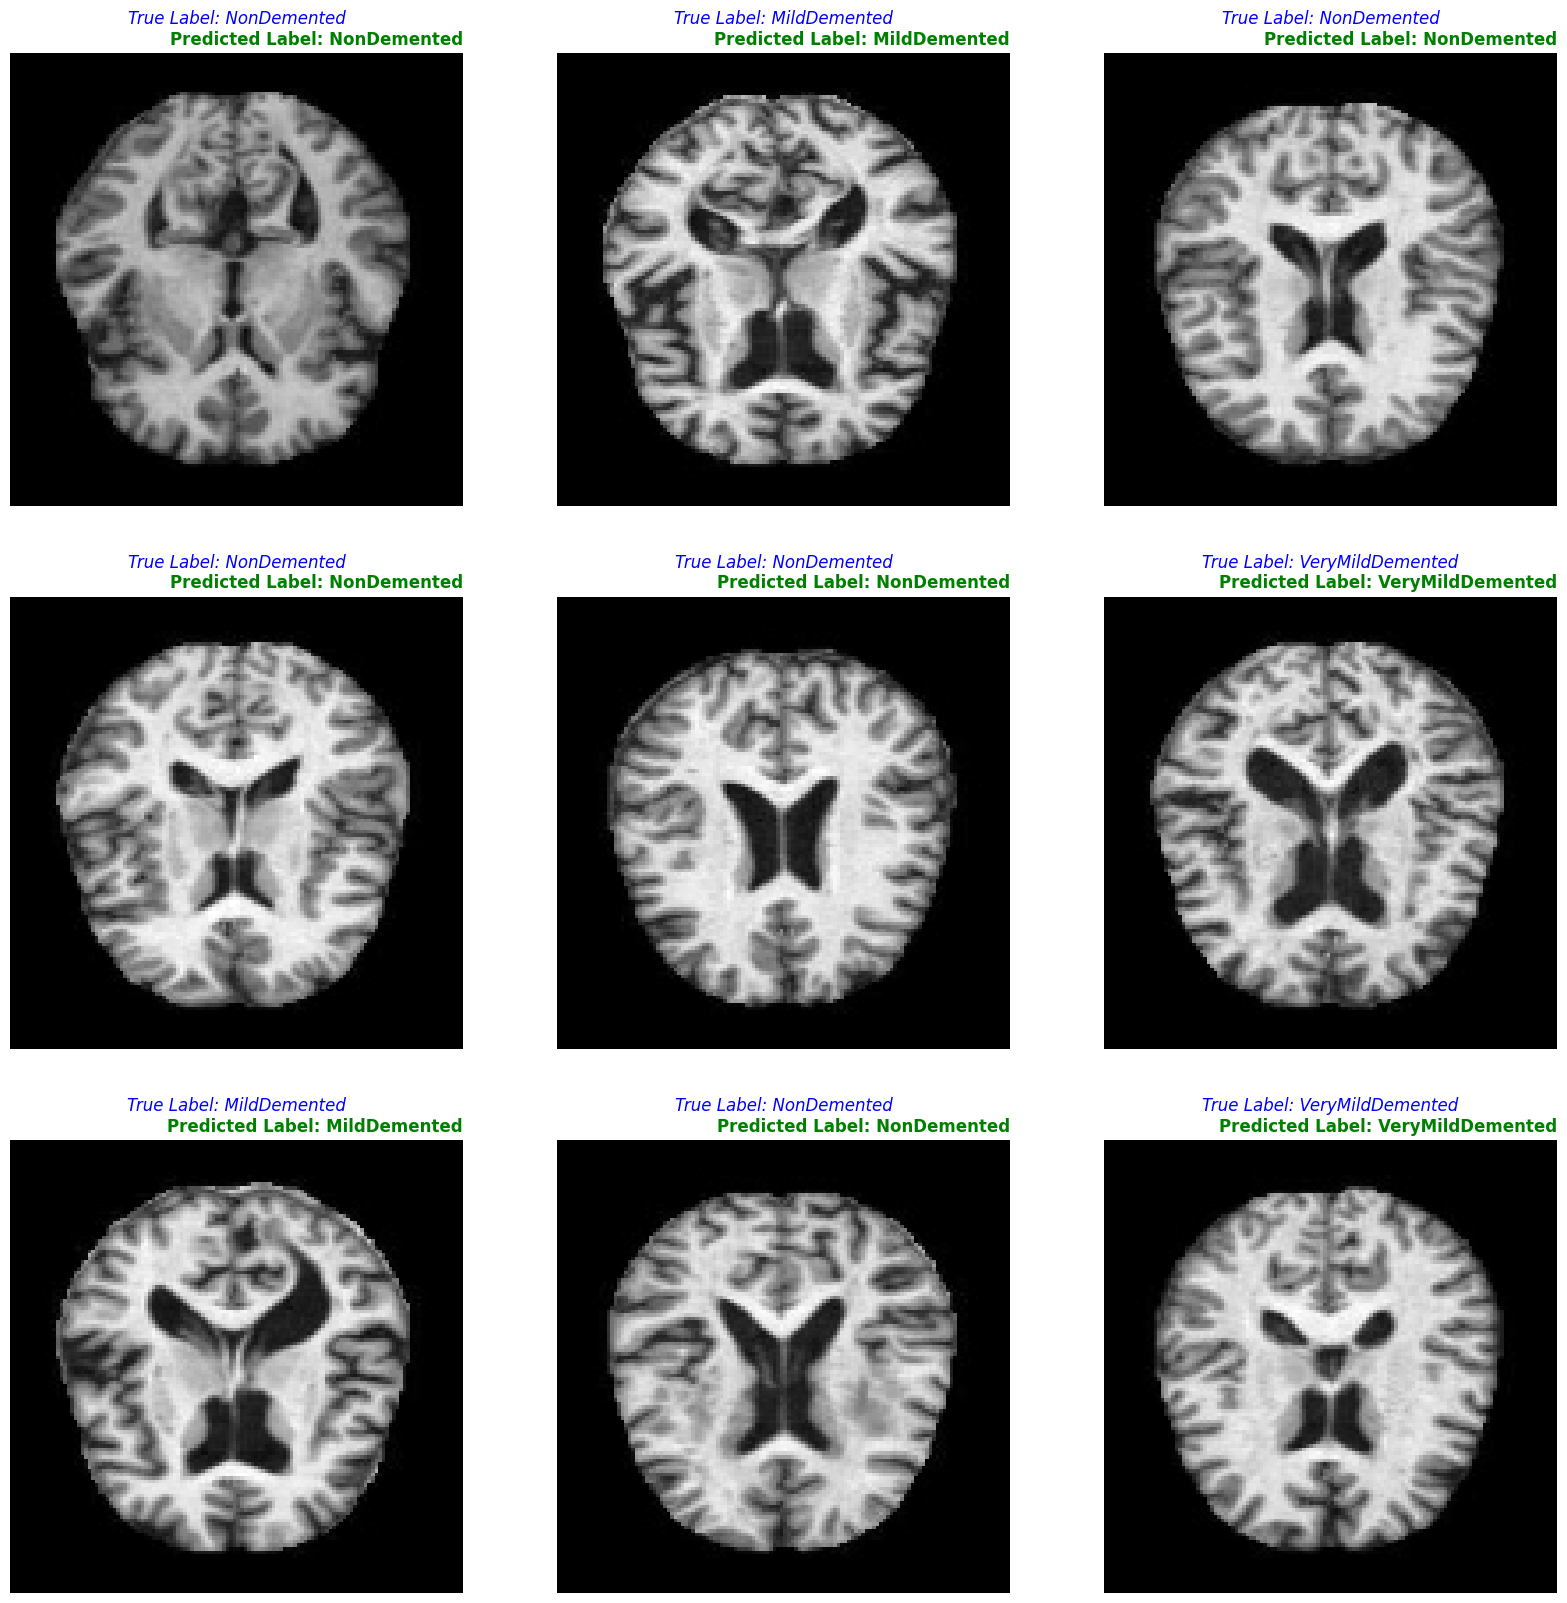

In [ ]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [13]:
model.save("cnn-model.h5")

# Saving in tensor flow lite [**tflite**] format to integerate with Mobile/Desktop App

In [ ]:
# Directory to save TFLite model and labels
model_dir = '/content/drive/MyDrive/models'

In [ ]:
model.save("AD_labels_CNN-model.h5")

In [ ]:
# Save TFLite model
model_path = os.path.join(model_dir, 'AD_labels_CNN-model.tflite')
with open(model_path, 'wb') as f:
    f.write(tflite_model)

# Save labels text file
labels_path = os.path.join(model_dir, 'AD_labels_CNN-model.txt')
with open(labels_path, 'w') as f:
    f.write('\n'.join(class_names))

NameError: name 'tflite_model' is not defined